In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
!kaggle datasets download -d paresh2047/uci-semcom

  0% 0.00/2.03M [00:00<?, ?B/s]
100% 2.03M/2.03M [00:00<00:00, 160MB/s]


In [3]:
!unzip /content/uci-semcom.zip

Archive:  /content/uci-semcom.zip
  inflating: uci-secom.csv           


In [4]:
df=pd.read_csv("/content/uci-secom.csv")

In [5]:
df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [6]:
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [8]:
df.drop(['Time'],axis=1, inplace=True)

In [9]:
df_statistic = df.describe().transpose()
df_2 = df.drop(df_statistic[df_statistic['std'] == 0].index, axis=1)

df_statistic_2 = df_2.describe().transpose()
df_3 = df.drop(df_statistic_2[(df_statistic_2['std'] > 0) & (df_statistic_2['std'] < 0.005)].index, axis=1)

In [10]:
for i in df_3.columns:
    if df_3[i].isna().sum() == 0:
        pass
    else:
        print(i,":",df_3[i].isna().sum()*100/len(df),"%")

0 : 0.3828972559029994 %
1 : 0.4467134652201659 %
2 : 0.8934269304403318 %
3 : 0.8934269304403318 %
4 : 0.8934269304403318 %
5 : 0.8934269304403318 %
6 : 0.8934269304403318 %
7 : 0.574345883854499 %
8 : 0.1276324186343331 %
9 : 0.1276324186343331 %
10 : 0.1276324186343331 %
11 : 0.1276324186343331 %
12 : 0.1276324186343331 %
13 : 0.1914486279514997 %
14 : 0.1914486279514997 %
15 : 0.1914486279514997 %
16 : 0.1914486279514997 %
17 : 0.1914486279514997 %
18 : 0.1914486279514997 %
19 : 0.6381620931716656 %
21 : 0.1276324186343331 %
22 : 0.1276324186343331 %
23 : 0.1276324186343331 %
24 : 0.1276324186343331 %
25 : 0.1276324186343331 %
26 : 0.1276324186343331 %
27 : 0.1276324186343331 %
28 : 0.1276324186343331 %
29 : 0.1276324186343331 %
30 : 0.1276324186343331 %
31 : 0.1276324186343331 %
32 : 0.06381620931716656 %
33 : 0.06381620931716656 %
34 : 0.06381620931716656 %
35 : 0.06381620931716656 %
36 : 0.06381620931716656 %
37 : 0.06381620931716656 %
38 : 0.06381620931716656 %
39 : 0.063816209

In [11]:
for i in df_3.columns:
    if df_3[i].isna().sum()*100/len(df_3) > 50 :
        df_3.drop([i],axis=1,inplace=True)
    else:
        pass

In [12]:
df_3=df_3.fillna(0)

In [13]:
correlation_matrix = df_3.corr()

column_df=pd.DataFrame(columns=df_3.columns[:528])
for i in correlation_matrix.columns[:528]:
   column_df.loc[0,i]=(correlation_matrix[i]>=0.5).sum()

for i in correlation_matrix.columns[:528]:
  if column_df.loc[0,i]>3:
    df_3 = df_3.drop([i], axis=1)

In [14]:
df_3

,0,1,3,8,9,10,13,14,19,20,...,559,561,570,571,583,585,586,587,589,Pass/Fail
0,3030.93,2564.00,1411.1265,1.5005,0.0162,-0.0034,0.0,7.9558,12.5190,1.4026,...,0.4385,42.3877,533.8500,2.1113,0.0118,2.3630,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,1463.6606,1.4966,-0.0005,-0.0148,0.0,10.1548,12.4608,1.3825,...,0.1745,18.1087,535.0164,2.4335,0.0223,4.4447,0.0096,0.0201,208.2045,-1
2,2932.61,2559.94,1698.0172,1.4436,0.0041,0.0013,0.0,9.5157,12.5404,1.4123,...,0.3718,24.7524,535.0245,2.0293,0.0157,3.1745,0.0584,0.0484,82.8602,1
3,2988.72,2479.90,909.7926,1.4882,-0.0124,-0.0033,0.0,9.6052,12.4782,1.4011,...,0.7288,62.7572,530.5682,2.0253,0.0103,2.0544,0.0202,0.0149,73.8432,-1
4,3032.24,2502.87,1326.5200,1.5031,-0.0031,-0.0072,0.0,10.5661,12.4735,1.3888,...,0.2156,22.0500,532.0155,2.0275,0.4766,99.3032,0.0202,0.0149,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,3085.3781,1.3424,-0.0045,-0.0057,0.0,11.7692,12.5373,1.4072,...,0.3553,32.3812,536.3418,2.0153,0.0143,2.8669,0.0068,0.0138,203.1720,-1
1563,3052.31,2522.55,1124.6595,1.4333,-0.0061,-0.0093,0.0,9.1620,12.4020,1.3949,...,0.3105,32.1048,537.9264,2.1814,0.0131,2.6238,0.0068,0.0138,203.1720,-1
1564,2978.81,2379.78,1110.4967,0.0000,0.0000,0.0000,0.0,0.0000,12.4555,1.4256,...,0.1266,13.0316,530.3709,2.3435,0.0153,3.0590,0.0197,0.0086,43.5231,-1
1565,2894.92,2532.01,1183.7287,1.4622,-0.0072,0.0032,0.0,9.7354,12.3937,1.3868,...,0.1920,18.9966,534.3936,1.9098,0.0178,3.5662,0.0262,0.0245,93.4941,-1


In [15]:
df_4_pass = df_3[df_3['Pass/Fail'] == -1].copy()
df_4_fail = df_3[df_3['Pass/Fail'] == 1].copy()

In [16]:
def outlier_change(df, weight_val, over15_li):

  for i in range(len(df.columns[:-1])):

    a = df[list(df.columns)[i]]
    weight = weight_val
    quantile_25 = np.percentile(a.values, 25)
    quantile_75 = np.percentile(a.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = list(a[a>highest_val].index) + list(a[a<lowest_val].index)
    lowest_index = list(a[(a<lowest_val)].index)
    highest_index = list(a[(a>highest_val)].index)

    if(len(outlier_index) != 0) : 

      if(len(outlier_index) >= len(df)*0.15): 
          over15_li.append(list(df.columns)[i])
          over15_li.append(len(outlier_index))
       
      else:
        for index in range(0, len(lowest_index)):
          df.loc[[lowest_index[index]],[list(df.columns)[i]]] = lowest_val

        for index in range(0, len(highest_index)):
          df.loc[[ highest_index[index]],[list(df.columns)[i]]] =  highest_val

In [17]:
over15percent_result = [] 
outlier_change(df_4_pass,1.5,over15percent_result)
over15percent_result

['31', 340, '40', 320, '129', 224]

In [30]:
def namestr(obj, namespace):
    get_name=[name for name in namespace if namespace[name] is obj]
    return get_name[0]

def Change(a1):
    return namestr(a1, globals())

def importance_scatter_plot(data1, data2, Num, lank):
    normal_data = data1.copy()
    defective_data = data2.copy()

    importance = []

    columns = data1.columns

    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            if i >= j:
                continue

            normal_group = normal_data[[col1, col2]].values
            defective_group = defective_data[[col1, col2]].values

            section_size = (data1[col1].max() - data1[col1].min()) / Num

            normal_mean_list = []
            defective_mean_list = []
            normal_std_list = []
            defective_std_list = []

            for k in range(Num):
                section_min = data1[col1].min() + k * section_size
                section_max = section_min + section_size
                
                normal_section = normal_group[(normal_group[:,0] >= section_min) & (normal_group[:,0] < section_max)]
                defective_section = defective_group[(defective_group[:,0] >= section_min) & (defective_group[:,0] < section_max)]

                if len(normal_section) == 0 or len(defective_section) == 0:
                    continue

                normal_mean = np.mean(normal_section, axis=0, keepdims=True)
                defective_mean = np.mean(defective_section, axis=0, keepdims=True)
                normal_std = np.std(normal_section, axis=0, keepdims=True)
                defective_std = np.std(defective_section, axis=0, keepdims=True)

                if (normal_std == 0).any() or (defective_std == 0).any():
                    continue

                normal_mean_list.append(normal_mean)
                defective_mean_list.append(defective_mean)
                normal_std_list.append(normal_std)
                defective_std_list.append(defective_std)

            if len(normal_mean_list) > 0 and len(defective_mean_list) > 0:
                normal_mean_array = np.concatenate(normal_mean_list, axis=0)
                defective_mean_array = np.concatenate(defective_mean_list, axis=0)
                normal_std_array = np.concatenate(normal_std_list, axis=0)
                defective_std_array = np.concatenate(defective_std_list, axis=0)

                mahalanobis_diff = np.sqrt(np.sum(np.square(normal_mean_array - defective_mean_array) / ((normal_std_array**2 + defective_std_array**2)/4), axis=1))
                importance.append((col1, col2, np.mean(mahalanobis_diff)))
                
    importance_sorted = sorted(importance, key=lambda x: x[2], reverse=True)
    threshold_index = lank
    threshold = importance_sorted[threshold_index][2]

    important_vars = [(t[0], t[1]) for t in importance_sorted[:lank]]
    important_vars = list(set(important_vars))

    return important_vars

In [31]:
scatter=importance_scatter_plot(df_4_pass, df_4_fail, 10, 10)

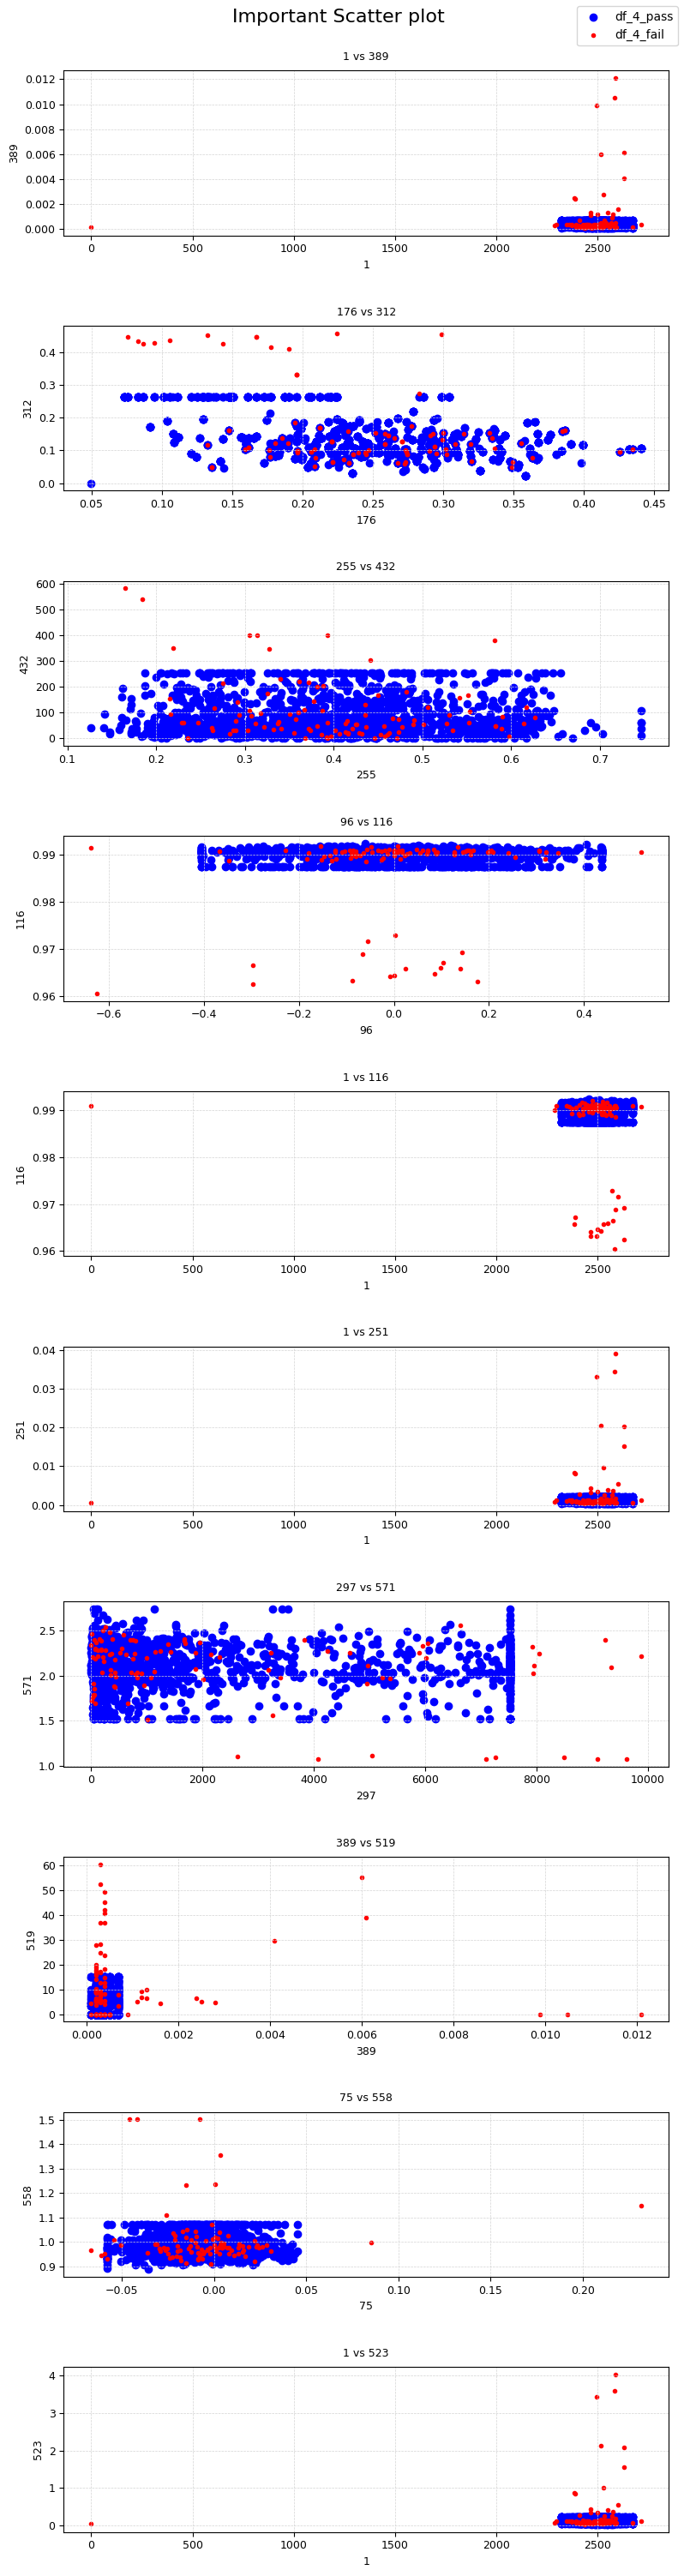

In [46]:
fig, axs = plt.subplots(10, 1, figsize=(8, 30))

for i, (col1, col2) in enumerate(scatter):
    axs[i].scatter(df_4_pass[col1], df_4_pass[col2], color='blue', label='Normal')
    axs[i].scatter(df_4_fail[col1], df_4_fail[col2], color='red', marker='.', label='Defective')
    axs[i].set_xlabel(col1, fontsize=9)
    axs[i].set_ylabel(col2, fontsize=9)
    axs[i].tick_params(axis='both', which='major', labelsize=9)
    axs[i].set_title(f'{col1} vs {col2}', fontsize=9, y=1.02)
    axs[i].grid(color='lightgray', linestyle='--', linewidth=0.5)

fig.legend(labels=[Change(df_4_pass), Change(df_4_fail)], loc='upper right')
fig.suptitle('Important Scatter plot', fontsize=16, y=1.0)
fig.tight_layout(h_pad=3, w_pad=8)
plt.show()

#Supervised Learning

In [74]:
final_df = pd.concat([df_4_fail,df_4_pass], axis=0)
x_data = final_df.drop(['Pass/Fail'], axis=1)
y_data = final_df['Pass/Fail']

y_data = y_data.replace(-1, 0)

k = 5  
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=10)

accuracy_scores = []
f1_scores = []

for train_index, val_index in kf.split(x_data, y_data):

    X_train, X_val = x_data.iloc[train_index], x_data.iloc[val_index]
    y_train, y_val = y_data.iloc[train_index], y_data.iloc[val_index]

    smote = SMOTE(sampling_strategy='auto', k_neighbors=5)
    X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

    model = XGBClassifier()
    model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_val)

    accuracy = (y_pred == y_val).mean() 
    accuracy_scores.append(accuracy)

    f1 = f1_score(y_val, y_pred)
    f1_scores.append(f1)

print('best accuracy_score:', max(accuracy_scores))
print('best f1 score:', max(f1_scores))

best accuracy_score: 0.9776357827476039
best f1 score: 0.8


#Active Learning

레이블링이 되지 않는 데이터 중, 불확실성을 기반한 샘플을 우선 순위로 해서 레이블링을 하는 방식.

본 프로젝트는 Active Learning 구현과 더불어 Labeling Cost를 비교분석하기 위함

In [127]:
def select_uncertain_samples(model, unlabeled_data, n_samples):
    y_prob = model.predict_proba(unlabeled_data)
    entropy = -np.sum(y_prob * np.log2(y_prob), axis=1)
    uncertain_indices = np.argsort(entropy)[-n_samples:]

    return uncertain_indices

In [128]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, stratify = y_data, random_state=42)

smote = SMOTE(sampling_strategy='auto', k_neighbors=5)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1096, 315) (1096,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (2046, 315) (2046,)
SMOTE 적용 후 레이블 값 분포:
 0    1023
1    1023
Name: Pass/Fail, dtype: int64


In [129]:
initial_idx = np.random.choice(range(len(X_train_over)), size=100, replace=False)
x_labeled = X_train_over.iloc[initial_idx]
y_labeled = y_train_over.iloc[initial_idx]

x_unlabeled = X_train_over.drop(X_train_over.index[initial_idx])
y_unlabeled = y_train_over.drop(y_train_over.index[initial_idx])

model = XGBClassifier()
model.fit(x_labeled, y_labeled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [130]:
f1_score_history = []
accuracy_history = []

for step in range(500):
    confused_indices = select_uncertain_samples(model, x_unlabeled, 10)

    x_confused = x_unlabeled.iloc[confused_indices]
    y_confused = y_unlabeled.iloc[confused_indices]
    
    x_unlabeled = x_unlabeled.drop(x_unlabeled.index[confused_indices])
    y_unlabeled = y_unlabeled.drop(y_unlabeled.index[confused_indices])
    
    x_labeled = np.concatenate([x_labeled, x_confused])
    y_labeled = np.concatenate([y_labeled, y_confused])

    model = XGBClassifier()
    model.fit(x_labeled, y_labeled)

    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    f1_score_history.append(f1)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_history.append(accuracy)

    print("Step", step+1)
    print('label :',x_labeled.shape)
    print('unlabel :',x_unlabeled.shape)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)
    print()

    if f1 > 0.79 :
      break

Step 1
label : (110, 315)
unlabel : (1936, 315)
F1 Score: 0.1948051948051948
Accuracy: 0.7367303609341825

Step 2
label : (120, 315)
unlabel : (1926, 315)
F1 Score: 0.26153846153846155
Accuracy: 0.7961783439490446

Step 3
label : (130, 315)
unlabel : (1916, 315)
F1 Score: 0.23333333333333334
Accuracy: 0.8046709129511678

Step 4
label : (140, 315)
unlabel : (1906, 315)
F1 Score: 0.234375
Accuracy: 0.7919320594479831

Step 5
label : (150, 315)
unlabel : (1896, 315)
F1 Score: 0.25423728813559326
Accuracy: 0.8131634819532909

Step 6
label : (160, 315)
unlabel : (1886, 315)
F1 Score: 0.3076923076923077
Accuracy: 0.8662420382165605

Step 7
label : (170, 315)
unlabel : (1876, 315)
F1 Score: 0.2588235294117647
Accuracy: 0.8662420382165605

Step 8
label : (180, 315)
unlabel : (1866, 315)
F1 Score: 0.4050632911392405
Accuracy: 0.9002123142250531

Step 9
label : (190, 315)
unlabel : (1856, 315)
F1 Score: 0.42105263157894735
Accuracy: 0.9065817409766455

Step 10
label : (200, 315)
unlabel : (1846,

Supervised Learning의 경우 2046개의 레이블을 사용하여 F1-score 0.8, Accuracy 0.97을 달성하였으나,

Active Learning의 경우 660개의 레이블을 사용하여 동일한 성능을 달성하였다.

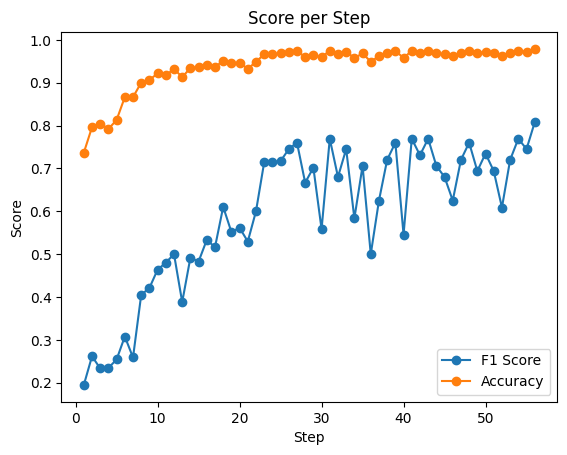

In [133]:
plt.plot(range(1,57), f1_score_history, marker='o', label='F1 Score')
plt.plot(range(1,57), accuracy_history, marker='o', label='Accuracy')
plt.xlabel('Step')
plt.ylabel('Score')
plt.title('Score per Step')
plt.legend()
plt.show()